# Exploratory Data Analysis and Visualization

## Data Introduction
- Datataset Name: Marketing A/B Testing
- Data Source: The dataset was found on kaggle. Link - https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data
- Data Collection: The data is collect through random experimentation where the majority of the random sample were exposed to the ad and the rest to the Public Service Announcement.
- Number of rows: 588101
- Number of Variables: Excluding the Index, there are 6 variables
- Variable Names and Types:
    - Index: Row index
    - user id: User ID (unique)
    - test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
    - converted: If a person bought the product then True, else is False
    - total ads: Amount of ads seen by person
    - most ads day: Day that the person saw the biggest amount of ads
    - most ads hour: Hour of day that the person saw the biggest amount of ads
    
The marketing dataset is a dataset collected in the context of A/B testing where marketing companies want to run an ad campaign inplace of a Public Service Announcement. They want to test whether the campaign is successful. To test that, random experimentation is done and data of 588101 people are collected where majority of the people are exposed to the ad and the rest are exposed to a Public Service Announcement that is placed in the same place as the ad. A converted variable is recorded which indicates whether the person bought the product the ad was advertising or not. Three other additional variables such as the total ads seen by a person, the day the the person saw the most amount of ads and the hour of the day the person saw the most amount of ads were also recorded.

## Research Question
*Do users in the "ad" group have a higher conversion rate compared to users in the "psa" group?*

## Exploratory Data Analysis

In [1]:
# Loading Required Libraries
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load and check the data
data <- read_csv(url("https://raw.githubusercontent.com/Krithik1/STAT_301_PROJECT/master/data/marketing_AB.csv"))
head(data)

New names:
• `` -> `...1`
Rows: 588101 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): test group, most ads day
dbl (4): ...1, user id, total ads, most ads hour
lgl (1): converted

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,user id,test group,converted,total ads,most ads day,most ads hour
<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<dbl>
0,1069124,ad,FALSE,130,Monday,20
1,1119715,ad,FALSE,93,Tuesday,22
2,1144181,ad,FALSE,21,Tuesday,18
3,1435133,ad,FALSE,355,Tuesday,10
4,1015700,ad,FALSE,276,Friday,14
5,1137664,ad,FALSE,734,Saturday,10


In [3]:
# Change colnames to make tidy (replace spaces with . and ...1 to index)
colnames(data)[1] <- "index"
colnames(data) <- gsub(" ", ".", colnames(data))

In [4]:
head(data)

index,user.id,test.group,converted,total.ads,most.ads.day,most.ads.hour
<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<dbl>
0,1069124,ad,FALSE,130,Monday,20
1,1119715,ad,FALSE,93,Tuesday,22
2,1144181,ad,FALSE,21,Tuesday,18
3,1435133,ad,FALSE,355,Tuesday,10
4,1015700,ad,FALSE,276,Friday,14
5,1137664,ad,FALSE,734,Saturday,10


In [5]:
# Column Descriptions
str(data)

spc_tbl_ [588,101 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ index        : num [1:588101] 0 1 2 3 4 5 6 7 8 9 ...
 $ user.id      : num [1:588101] 1069124 1119715 1144181 1435133 1015700 ...
 $ test.group   : chr [1:588101] "ad" "ad" "ad" "ad" ...
 $ converted    : logi [1:588101] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ total.ads    : num [1:588101] 130 93 21 355 276 734 264 17 21 142 ...
 $ most.ads.day : chr [1:588101] "Monday" "Tuesday" "Tuesday" "Tuesday" ...
 $ most.ads.hour: num [1:588101] 20 22 18 10 14 10 13 18 19 14 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   `user id` = col_double(),
  ..   `test group` = col_character(),
  ..   converted = col_logical(),
  ..   `total ads` = col_double(),
  ..   `most ads day` = col_character(),
  ..   `most ads hour` = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [6]:
# Check if data has any null values
anyNA(data)

[1] FALSE

***There is no null data in the dataset. Thus, the data is in tidy format, now we can select the required columns.***

## Why select only certain columns?

The primary research question aims to investigate whether users in the "ad" group exhibit a higher conversion rate compared to users in the "psa" group. Simultaneously, the analysis also intends to explore the potential impact of the day of the week on the conversion rate.

1. **Relevance to the Research Question**: The selected columns directly relate to the research question. "test.group" serves as the key independent variable (explanatory variable), allowing us to compare the "ad" and "psa" groups in terms of their conversion rates. "converted" is the dependent variable (response variable), representing whether a user converted, which is the central metric for assessing the success of the ad campaign.

2. **Day of the Week Investigation**: To gain a more comprehensive understanding of the factors influencing conversion rates, the day of the week, as indicated by the "most.ads.day" column, is included as an additional variable. This choice allows us to assess whether certain days of the week have a statistically significant impact on conversion rates, beyond the effect of the "test.group."

In [7]:
# Keep only columns in use
data <- data %>% select(test.group, most.ads.day, converted)
head(data)

test.group,most.ads.day,converted
<chr>,<chr>,<lgl>
ad,Monday,FALSE
ad,Tuesday,FALSE
ad,Tuesday,FALSE
ad,Tuesday,FALSE
ad,Friday,FALSE
ad,Saturday,FALSE


## Adding a time variable

In [8]:
set.seed(12342)  # Set seed for reproducibility
data <- data %>%
        mutate(time = sample(seq(as.POSIXct("2022-01-01"), as.POSIXct("2023-01-01"), by="1 week"), nrow(data), replace=TRUE)) %>%
        arrange(time)
head(data)
tail(data)

test.group,most.ads.day,converted,time
<chr>,<chr>,<lgl>,<dttm>
ad,Sunday,FALSE,2022-01-01
ad,Saturday,TRUE,2022-01-01
ad,Saturday,FALSE,2022-01-01
ad,Sunday,FALSE,2022-01-01
ad,Saturday,FALSE,2022-01-01
ad,Saturday,FALSE,2022-01-01


test.group,most.ads.day,converted,time
<chr>,<chr>,<lgl>,<dttm>
ad,Tuesday,FALSE,2022-12-31
ad,Tuesday,FALSE,2022-12-31
ad,Tuesday,FALSE,2022-12-31
ad,Tuesday,FALSE,2022-12-31
ad,Tuesday,FALSE,2022-12-31
ad,Tuesday,FALSE,2022-12-31


## Visualization

To check if we have a statistically significant effect between the test group and converted, we would need the conversion rates for both the "ad" and "psa" group. Since, I also want to check if the days of the week has a statistically significant effect on the convertion rate, we can combine all 3 variables in a single stacked bar chart with Days of the Week in the x-axis and conversion rate on the y-axis and in every bar, the bottom bar is for the "psa" group and the top bar is for the "ad" group.

The insights derived from the stacked bar chart provide a clear direction for subsequent analyses. It suggests that separate A/B tests can be performed for each day of the week to test whether the conversion rates for "ad" and "psa" are statistically different. This step allows us to identify the days of the week when ads have the most significant persuasive impact on people's decisions to purchase the product.

`summarise()` has grouped output by 'most.ads.day'. You can override using the
`.groups` argument.


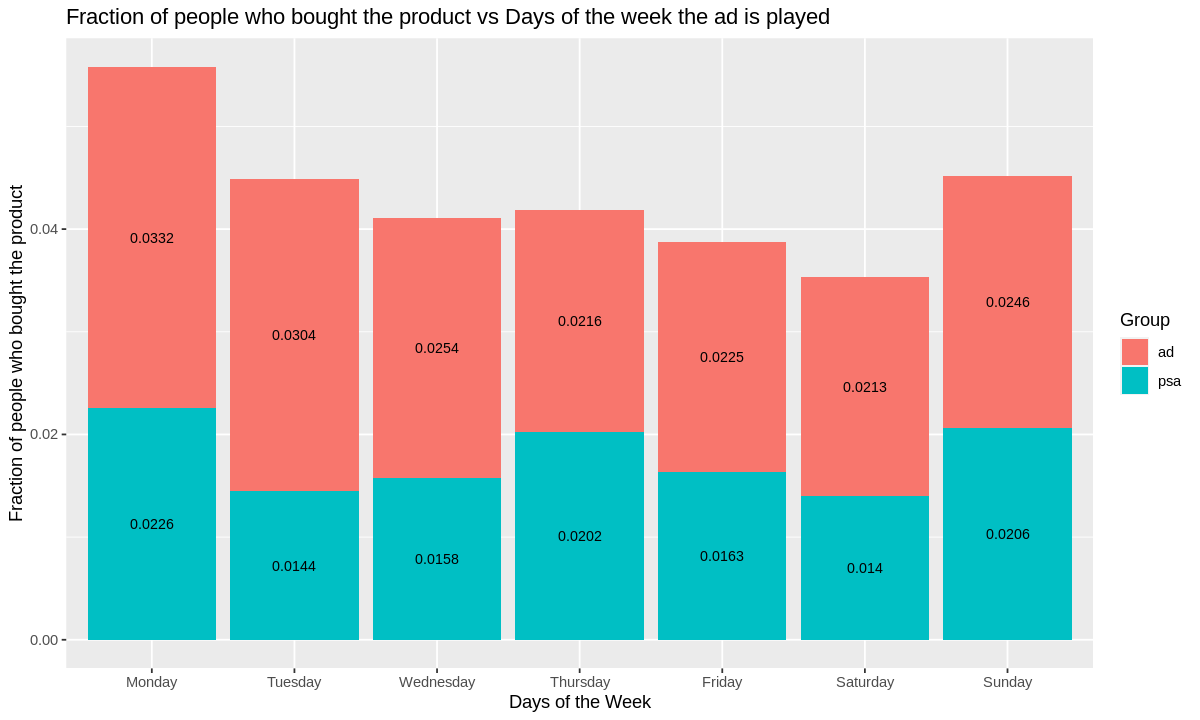

In [9]:
# Set width and height of the plot
options(repr.plot.width = 10, repr.plot.height = 6)

# Set order of the days
order_of_days <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
data$most.ads.day <- factor(data$most.ads.day, levels = order_of_days)

# Group and summarize the data to calculate the mean of people converted on each of the days and plot the result
plot <- data %>%
            group_by(most.ads.day, test.group) %>%
            summarize(meanConverted = mean(converted)) %>%
            ungroup() %>%
            ggplot(aes(x = most.ads.day, y = meanConverted, fill = test.group, label = round(meanConverted, 4))) + 
            geom_bar(stat = "identity") +
            geom_text(position = position_stack(vjust = 0.5), size = 3) +
            labs(x = "Days of the Week", y = "Fraction of people who bought the product", fill = "Group") +
            ggtitle("Fraction of people who bought the product vs Days of the week the ad is played")

plot

## Methods and Plans

We added a time variable to simulate sequential data. This is because if we want to implement early stopping in A/B testing then we need information about when the data is collected. By the simulation, we now have sequential data collected over the course of 1 year. The data is sufficiently large (58801 rows) to be representative of the population. We are assuming that the data is collected in batches. We can have approximately 100 batches, each having approximately 588 rows, which is also sufficiently large to conduct a theoretical hypothesis test. We can thus conduct sequential t-tests for each batch and stop the testing when the p-value reaches below the significance level.

### Why A/B Testing?

Since we want to compare two variations of the same product ("ad" or "psa") and their effects on how the rate of people buying the product changes in both groups, A/B testing seems the most appropriate choice.

### Hypothesis

**Null Hypothesis** ($H_0$): There is no difference in the mean conversion rate of the people watching the ad compared to the the people watching the Public Service Announcement.

**Alternative Hypothesis** ($H_A$): The mean conversion rate of the people watching the ad is higher than the mean conversion rate of the people watching the Public Service Announcement.

### Difference between A/B Testing and T-tests

In A/B testing, we conduct sequential t-tests in batches and stop the tests when the p-value is below the significance level. The main difference between these tests arises from the early stopping aspect of A/B testing. Early stopping can help the company use fewer resources to get the same results, but we must be careful.

If we use the significance level for the whole sample for each batch, we will likely stop too early. Stopping the experiment as soon as the p-value is below the significance level can drastically inflate the type I error. The error rates will be inflated since we are doing multiple t-tests, which means multiple comparisons.

***Solutions***

To fix this problem, we can use *Principled Peeking*. Principled peeking means adjusting the significance level we use to reject the null hypothesis. This way we can control the inflated Type I error.

In our study we will use 3 methods to adjust the significance level:-

1. *Bonferroni Correction* - We adjust the significance level by dividing it by the number of comparisons and use the raw p-values to test the hypothesis for each t-test.

2. *Pocock's Boundaries* - We adjust the test's critical values, which we can compute using the gsDesign function.

3. *O’Brien-Fleming’s Boundaries* - This is different from the other 2 corrections in the context that OF boundaries are non-uniform whereas the other 2 are uniform. It start with very conservative boundaries but as tests pass the critical values becomes less conservative. We can compute these boundaries using the gsDesign function.

We can compare the results from these 3 corrections and check which will give us a better approximation of the overall Type I error rate.

### Limitations

There might be a confounding variable that is not present in the analysis. This can give us wrong results. Confounding variable, in this context, is one which has a relationship with both the test.group variable and cinverted variable. This hidden variable might skew our results.

## Conclusion

We now have a plan for how to conduct the A/B test to get a statistically significant result.

***Expected Outcome:*** I hope to find a statistically significant result and conclude that the ad campaign was successful and the ads were more effective on certain days than others.

***Significance:*** These tests would help marketing companies decide if their ad campaign was successful and help them make a statistically informed financial decision - whether to invest more money in the campaign or stop it entirely.